Indian Used Car Price Prediction 2023

Project Overview

The aim of this project is to predict the price of used cars in major Indian metro cities.The prediction is based on various factors such as car manufacturer,model,variant,fuel type,color etc.This project uses data analysis and machine learning algorithms to provide insights and predict prices,hence benefitting both the buyers and sellers in the used car market.

In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
df=pd.read_csv("usedCars.csv")
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


Data Preprocessing

In [4]:
#shape of the dataset
df.shape

(1064, 19)

In [5]:
#columns in the dataset
df.columns

Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

In [6]:
#drop column 'Id' as it is not required for analysis
df.drop("Id",axis=1,inplace=True)

In [7]:
df

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,HYUNDAI,ELITE I20(2020-2020),ASTA O 1.2 BS VI,PETROL,White,42918,HATCHBACK,NaN,2020-09-01,2020,NaN,7.15 Lakhs,1st Owner,Rajasthan,K.S. Motors,Jaipur,1,8.3
1060,HYUNDAI,XCENT(2017-2020),S,PETROL,White,78910,SEDAN,NaN,2019-01-01,2019,NaN,5.00 Lakhs,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,7.8
1061,MAHINDRA,SCORPIO(2009-2014),VLX 2WD BS-III,DIESEL,White,76000,SUV,NaN,2013-05-01,2013,NaN,5.75 Lakhs,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,6.8
1062,MARUTI SUZUKI,VITARA BREZZA,VDI,DIESEL,Silver,80120,HATCHBACK,NaN,2018-06-01,2018,NaN,7.71 Lakhs,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,7.4


In [8]:
#Column datatypes present
df.dtypes

,0
Company,object
Model,object
Variant,object
FuelType,object
Colour,object
Kilometer,int64
BodyStyle,object
TransmissionType,object
ManufactureDate,object
ModelYear,int64


Typecasting Price Column Into Float

In [9]:
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs','').replace(',',''))*100000
    else:
        return float(amount_str.replace(',',''))
df['Price']=df['Price'].apply(convert_amount)


In [10]:
df

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,HYUNDAI,ELITE I20(2020-2020),ASTA O 1.2 BS VI,PETROL,White,42918,HATCHBACK,NaN,2020-09-01,2020,NaN,715000.0,1st Owner,Rajasthan,K.S. Motors,Jaipur,1,8.3
1060,HYUNDAI,XCENT(2017-2020),S,PETROL,White,78910,SEDAN,NaN,2019-01-01,2019,NaN,500000.0,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,7.8
1061,MAHINDRA,SCORPIO(2009-2014),VLX 2WD BS-III,DIESEL,White,76000,SUV,NaN,2013-05-01,2013,NaN,575000.0,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,6.8
1062,MARUTI SUZUKI,VITARA BREZZA,VDI,DIESEL,Silver,80120,HATCHBACK,NaN,2018-06-01,2018,NaN,771000.0,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,7.4


In [11]:
#checking for null values in terms of percentage
df.isnull().sum()/df.shape[0]*100

,0
Company,0.000000
Model,0.000000
Variant,0.000000
FuelType,0.093985
Colour,0.000000
Kilometer,0.000000
BodyStyle,0.000000
TransmissionType,67.105263
ManufactureDate,0.000000
ModelYear,0.000000


From the above output,we can infer that three columns have missing values-FuelType,TransmissionType and CngKit.So,I am going to remove the CngKit column as majority of the cars don't run on CNG fuel and also CNG cars can be identified by the FuelType,So will remove null value and replace it with 'No' in CngKit column.In TransmissionType,67% of the data is missing,hence we cannot conclude much with that information.In FuelType,I will drop the rows with null values.

In [12]:
#dropping of columns
df.drop("CngKit",axis=1,inplace=True)
df.drop("TransmissionType",axis=1,inplace=True)

In [13]:
#Removing null values from FuelType column
df["FuelType"].dropna(inplace=True)

Removing ManufacturerDate as we already have ModelYear column

In [14]:
df.drop("ManufactureDate",axis=1,inplace=True)

Changing ModelYear column to CarAge

In [15]:
df["ModelYear"]=2023-df["ModelYear"]
df.rename(columns={"ModelYear":"CarAge"},inplace=True)

In [16]:
for i in df.columns:
    print(i,df[i].nunique())


Company 23
Model 218
Variant 575
FuelType 5
Colour 76
Kilometer 1006
BodyStyle 10
CarAge 17
Price 362
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


Descriptive Statistics

In [17]:
df.describe()

,Kilometer,CarAge,Price,Warranty,QualityScore
count,1064.000000,1064.000000,1.064000e+03,1064.000000,1064.000000
mean,52807.187970,6.135338,8.350536e+05,0.738722,7.770207
std,33840.296979,2.996786,5.726538e+05,0.439538,0.719717
min,101.000000,0.000000,9.500000e+04,0.000000,0.000000
25%,32113.500000,4.000000,4.850000e+05,0.000000,7.500000
50%,49432.000000,6.000000,6.750000e+05,1.000000,7.800000
75%,68828.500000,8.000000,9.850000e+05,1.000000,8.100000
max,640000.000000,20.000000,8.500000e+06,1.000000,9.400000


In [18]:
df.head()

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,CarAge,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,5,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,2,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,8,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,3,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,13,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


Exploratory Data Analysis

Here,I will be able to show the data in a more visual manner to inorder to make the people understand.

Car Company

<ipython-input-19-c4bcaf9709eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Company"],order=df["Company"].value_counts().index,palette="Set3").set_title("Number of cars by company")


Text(0.5, 1.0, 'Number of cars by company')

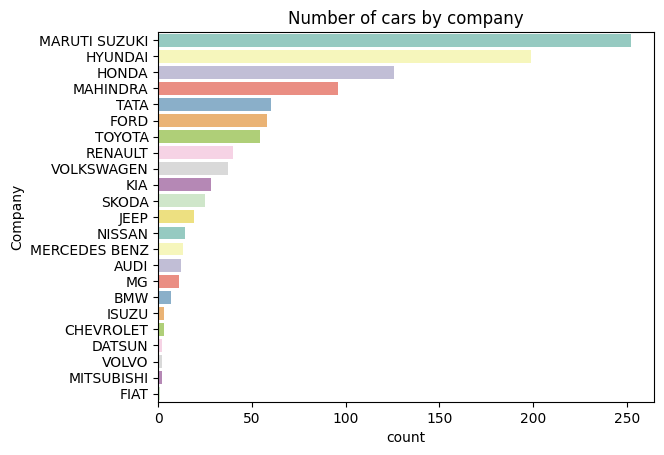

In [19]:
#Number of cars by company
sns.countplot(df["Company"],order=df["Company"].value_counts().index,palette="Set3").set_title("Number of cars by company")

From the above graph,there are total of 23 car companies,Out of which Maruti Suzuki,Hydundai,Honda,Mahindra and Tata are the top 5 companies whose used cars are on sale.Therefore,we can conclude by saying these company's cars have very good resale value.

Top 10 Cars in India

<ipython-input-20-a3f2e6d3c8d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Model"],order=df["Model"].value_counts().iloc[:10].index,palette="Set3").set_title("Top 10 cars in India")


Text(0.5, 1.0, 'Top 10 cars in India')

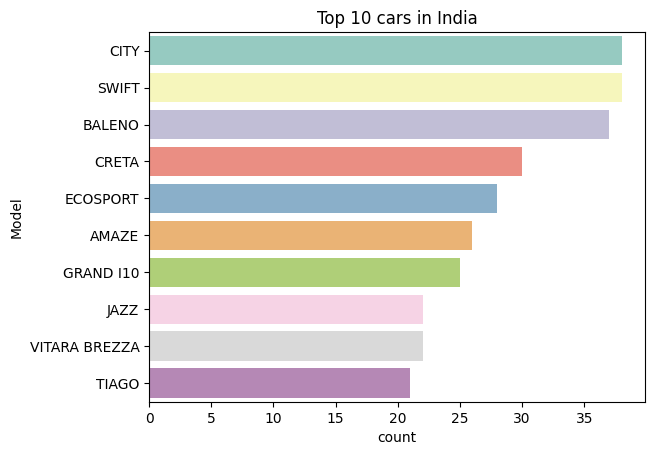

In [20]:
#top 10 cars in India
sns.countplot(df["Model"],order=df["Model"].value_counts().iloc[:10].index,palette="Set3").set_title("Top 10 cars in India")

Honda city and swift are the top 2 most selling used cars in the market right now,followed by baleno,creta,ecosport etc.This graph shows us that city and swift are more in demand in used car market.

Cars Fuel Type

<ipython-input-21-0b4ec8b48a1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="FuelType",palette="Set1").set_title("Number of cars based on fuel type")


Text(0.5, 1.0, 'Number of cars based on fuel type')

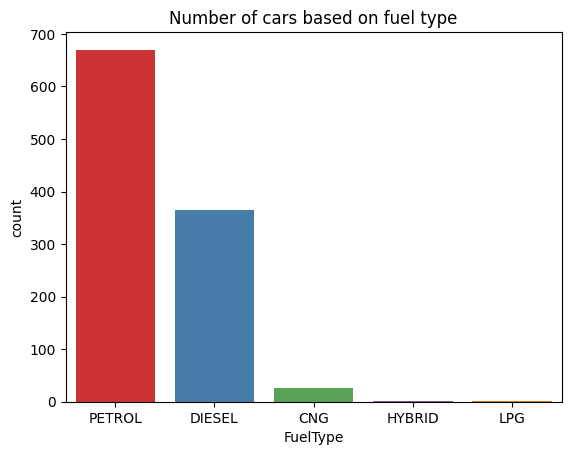

In [21]:
#Cars count based on fuel type
sns.countplot(data=df,x="FuelType",palette="Set1").set_title("Number of cars based on fuel type")

Here in this graph,Majority of the cars available for sale in the used car market are petrol engines ie close to 650 cars,followed by diesel engines close to 350.Very few cars are of Cng fuel.Hence,we can infer that petrol and diesel cars are in higher demand in the used car market.

Top 10 colours for cars

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Silver'),
  Text(2, 0, 'Grey'),
  Text(3, 0, 'Red'),
  Text(4, 0, 'Black'),
  Text(5, 0, 'Brown'),
  Text(6, 0, 'Blue'),
  Text(7, 0, 'A Blue'),
  Text(8, 0, 'Pearl White'),
  Text(9, 0, 'Orange')])

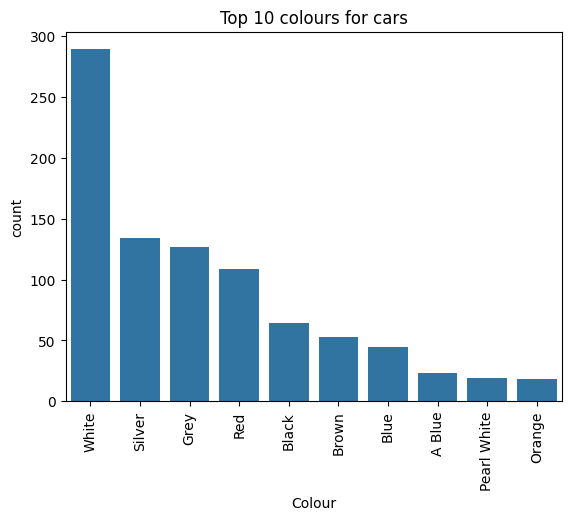

In [22]:
#Top 10 colours for cars
sns.countplot(data=df,x="Colour",order=df["Colour"].value_counts().iloc[:10].index).set_title("Top 10 colours for cars")
plt.xticks(rotation=90)

Although colours of cars have no impact on the car's performance,but stills plays a major role in the car used market.From the graph above,white is the most preferred colour followed by silver,grey,red,black etc.Hence,these colours are more in demand in the car used market.

Odometer Reading

Text(0.5, 1.0, 'Odometer Reading')

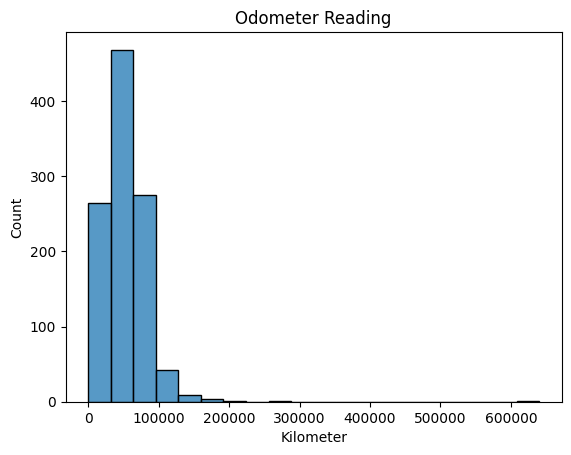

In [23]:
#odometer reading distribution
sns.histplot(data=df,x="Kilometer",bins=20).set_title("Odometer Reading")

From the above graph,We can see majority of the cars have a odometer reading below 100000 kms.Hence,we can infer that cars with odometer reading below 100000 kms are more in demand.

Body Style

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

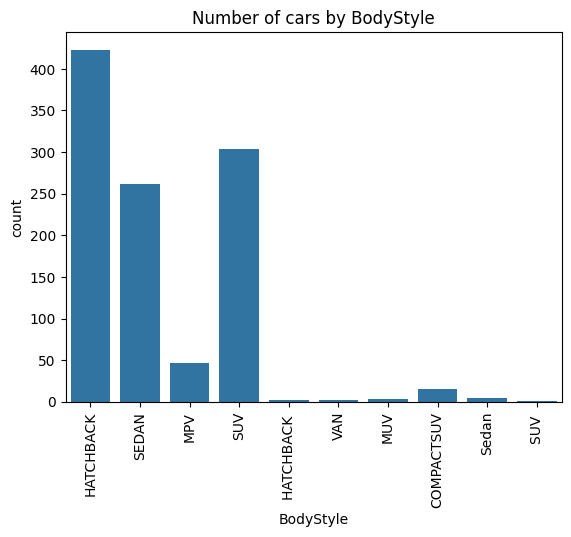

In [24]:
#Body style count
sns.countplot(data=df,x="BodyStyle").set_title("Number of cars by BodyStyle")
plt.xticks(rotation=90)


According to this graph,hatchbacks,sedans and suvs are selling higher that other bodystyles,which tells the market demand for these bodystyles.Hatchbacks are the highest selling bodystyle due to their affordable prices.Sedans and suvs are more or less the same price,Suvs are preferred by larger families as they are bigger cars,hence suvs sold more than sedans in the current used market.

Car Age

Text(0.5, 1.0, 'Car age distribution')

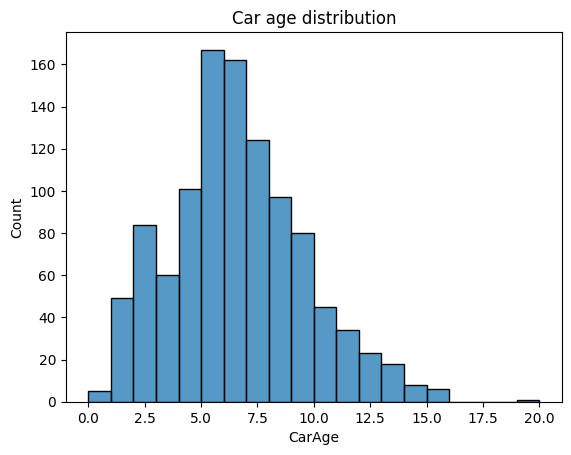

In [25]:
#Car age
sns.histplot(data=df,x="CarAge",bins=20).set_title("Car age distribution")

From the above graph,we can infer that Age plays an important role in deciding the resale value of the car.Here,cars between 5 to 7 years are more in number.However,there are still a significant number of cars below 5 years old,therefore I assume their resale cost will be higher.

Price Distribution

Text(0.5, 1.0, 'Car price distribution')

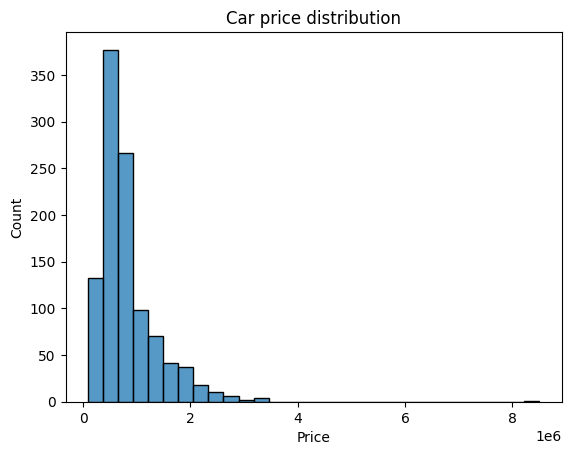

In [26]:
#Price Distribution
sns.histplot(data=df,x="Price",bins=30).set_title("Car price distribution")

This graph shows us about the price distribution of the cars.Most of the cars have price is between 3 to 9 lakhs, with maximum cars between 3 to 6 lakhs. Therefore, we can assume that cars with price between 3 to 9 lakhs are more in demand in the used car market. Moreover there are some cars with resale price more than 20 lakhs, which could be possible for luxury cars.

Location Based Distribution

<ipython-input-27-a9dd9716186d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
<ipython-input-27-a9dd9716186d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
<ipython-input-27-a9dd9716186d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

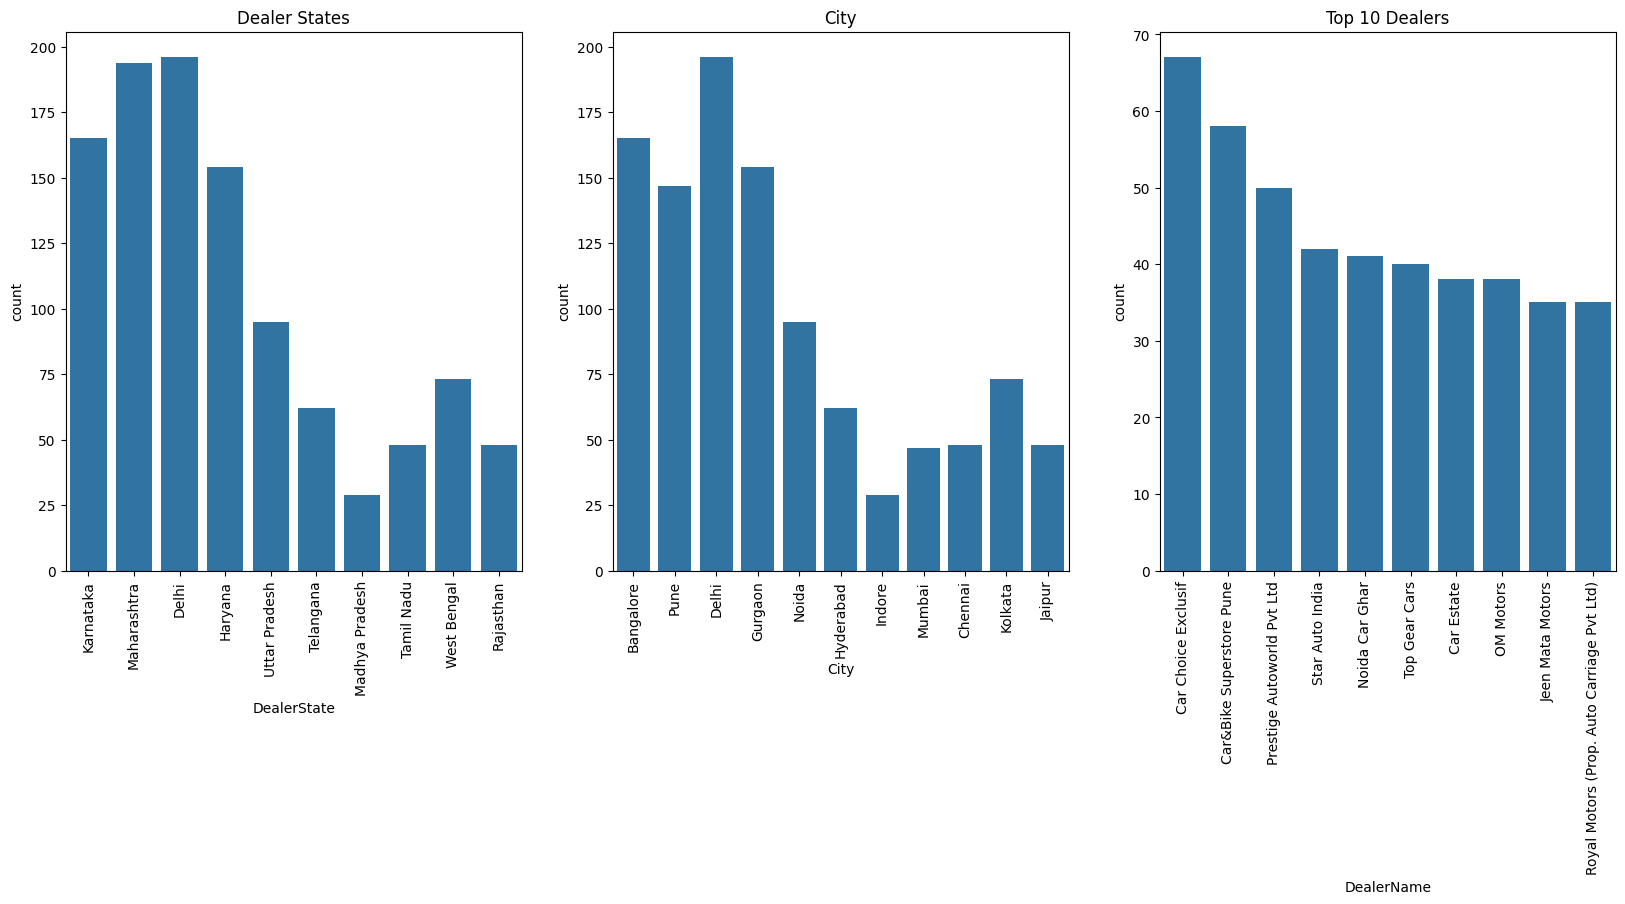

In [27]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.countplot(x = 'DealerState', data = df, ax = ax[0]).set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.countplot(x = 'City', data = df, ax = ax[1]).set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.countplot(x = 'DealerName', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2]).set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

These graphs shows the distribution of cars based on their dealer state, city and Dealer Name. In the dealer state graph, we see that Delhi and Maharashtra have the highest number of used cars for sale followed by Karnataka and Haryana. In the dealer city graph, we see that Delhi has the highest number of cars which is obvious from the the previous graph, however in contrast to the previous graph, Banglore has more used cars for sale than Pune, infact Pune has lower car count than Gurgaon. In the dealer name graph, we see that Car Choice Exclusif, Car&Bike Superstore Pune and Prestige Autoworld Pvt Ltd are moung the top 3 dealers with highest number of used cars for sale.

Car Owner Type

Text(0.5, 1.0, 'Number of cars by Ownertype')

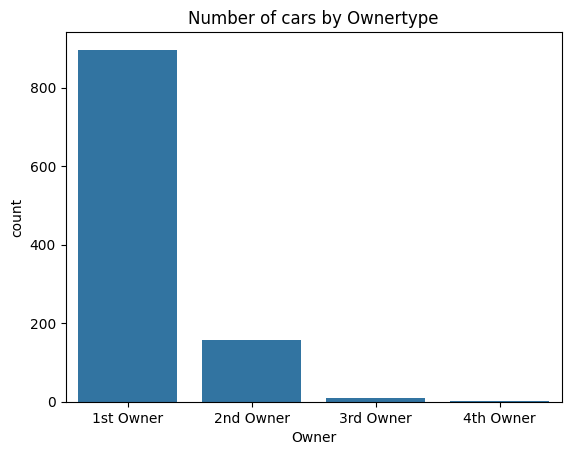

In [28]:
sns.countplot(data=df,x="Owner").set_title("Number of cars by Ownertype")

The car owner type has a huge impact on its resale value. Majority of the cars that are been sold are 1st Owner cars followed by 2nd Owner cars which are significantly less in number as compared to 1st Owner. Moreover, the 3rd and 4th owner cars are very less in number. Therefore, we can assume that 1st Owner cars are more preferred in the used car market and have a good resale value.

Warranty

Text(0.5, 1.0, 'Number of cars by warranty')

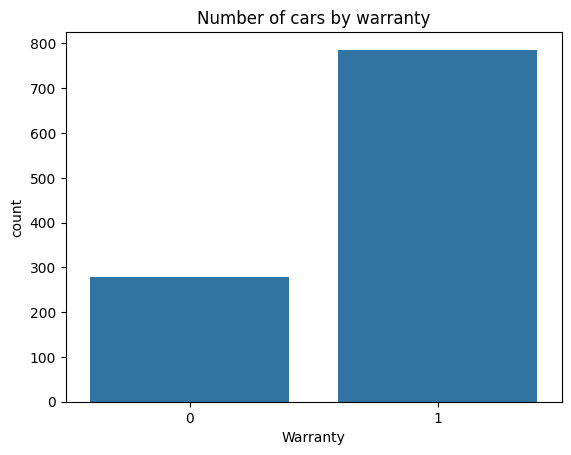

In [29]:
sns.countplot(x="Warranty",data=df).set_title("Number of cars by warranty")

This graphs shows the number of used cars for sale that come with a warranty from the dealership company. The warranty plays a major role and customers prefer to purchase a car with warranty, it has been shown in the graph where we can see than the number cars with warranty is almost twice the number of cars without warranty.

Quality Score

Text(0.5, 1.0, 'Qualtiy score distribution')

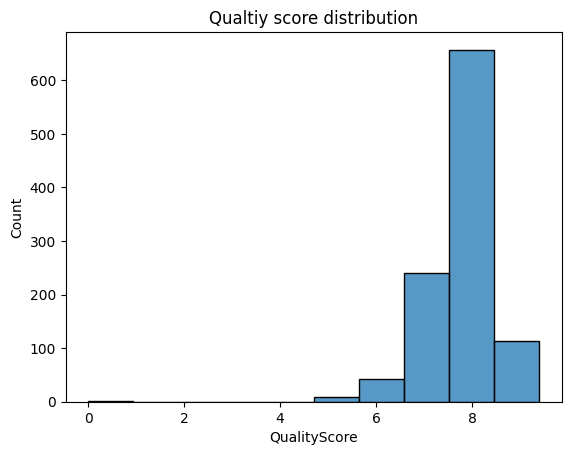

In [30]:
sns.histplot(data=df,bins=10,x="QualityScore").set_title("Qualtiy score distribution")

Quality score is an important feature which has a huge impact on the car sales and its preference by the customers. Cars with higher quality scores tend to have a much higher resale value and are more preferred by the customers. In this graph, most of the cars have a decent quality score between 7-8, which highlights that the cars are thoroughly checked before being sold in the used car market. However, there are some cars with quality score less than 5, which could be due to the fact that they are not in good condition or they could be very old.

So far I have done this data visualisation for the better understanding for myself.Now,I will be comparing each column with respect to the price.

Top 10 car companies by price

Text(0.5, 1.0, 'Top 10 car companies by price')

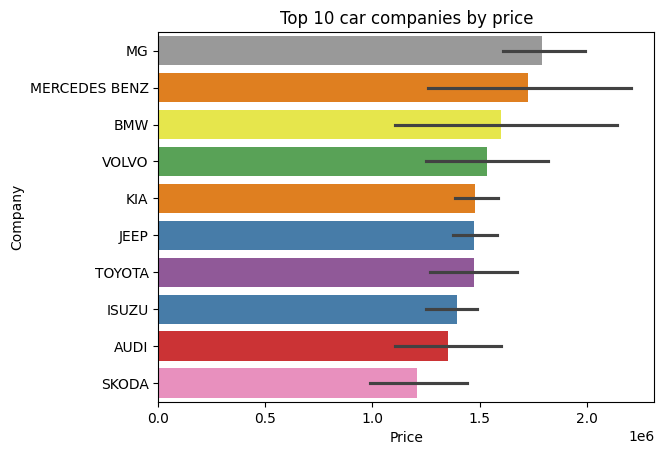

In [31]:
#Top 10 car companies by price
sns.barplot(y="Company",x="Price",data=df,order=df.groupby("Company")["Price"].mean().sort_values(ascending=False).iloc[:10].index,hue="Company",palette="Set1").set_title("Top 10 car companies by price")

This graphs highlights the top 10 car companies in the dataset with the highest resale value. The MG, Mercedes Benz and BMW are the top 3 car companies with the highest resale value, since these are luxury car companies. The list also includes Volvo. followed by KIA, Jeep and Toyota. Surprisingly Audi has much lower resale price has compared to the other luxury car companies which might be due to other features.

Moreover, my prevous analysis about the car companies -Maruti Suzuki, Hyundai, Honda, Mahindra and Tata, was wrong as they are not in the top 10 list. This means that these companies cars are in greater number due to their demand because of low price.

Top 10 car models by price

Text(0.5, 1.0, 'Top 10 car models by price')

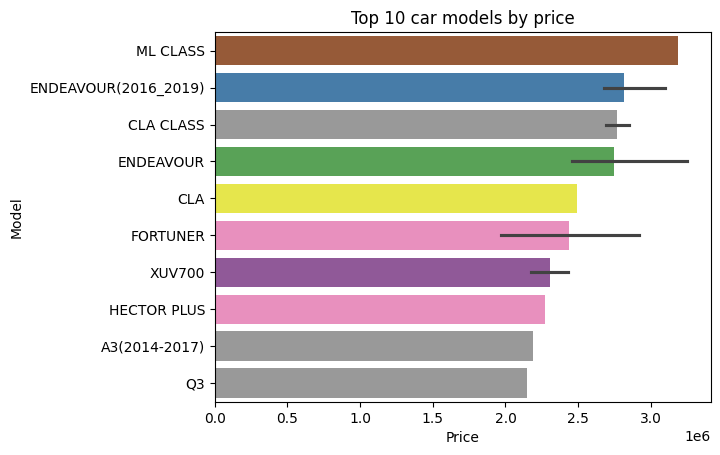

In [32]:
#Top 10 car models by price
sns.barplot(y="Model",x="Price",data=df,order=df.groupby("Model")["Price"].mean().sort_values(ascending=False).iloc[:10].index,hue="Model",palette="Set1").set_title("Top 10 car models by price")

This graph shows the relation between the car model and it resale value and we can see that it shows similarity woth the previous graph. The car models - ML Class, Endeavour(2016_2019), CLA class are the top three models with highest resale value, followed by CLA, Fortuner and XUV700. Like the previous graph, the audi model A3 is at the 9th position with a much lower resale value as compared to the other models.

In the car model also my analysis was wrong as I assummed that Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we came to know that these car in higher number due to their high demnad because of low price.


Car FuelType and Price

Text(0.5, 1.0, 'Price by fueltype')

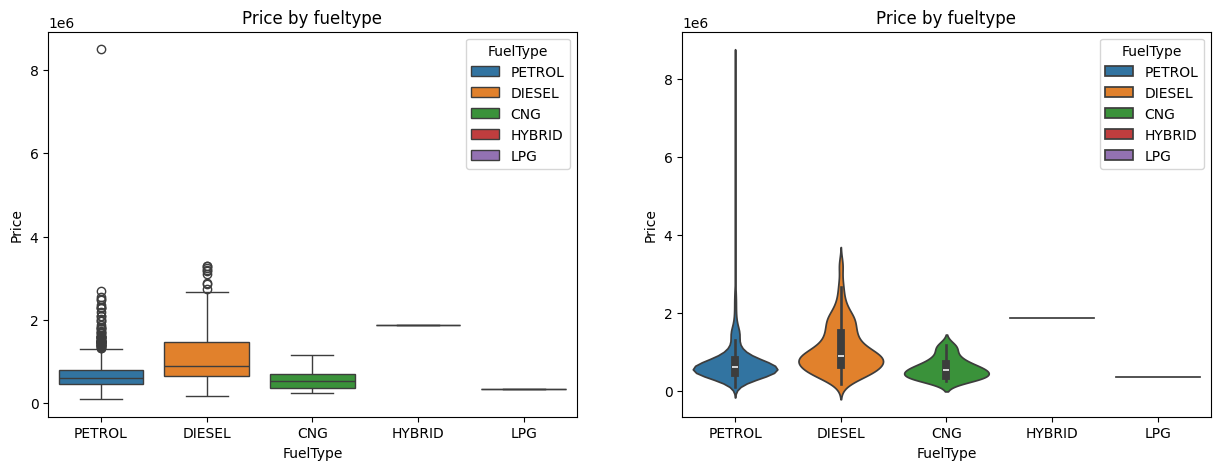

In [33]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x="FuelType",y="Price",ax=ax[0],data=df,hue="FuelType").set_title("Price by fueltype")
sns.violinplot(x="FuelType",y="Price",ax=ax[1],data=df,hue="FuelType").set_title("Price by fueltype")


The above graphs presents two charts that visualize the relationship between car "FuelType" and "Price". Both charts are set against the same axes, with "FuelType" on the x-axis and "Price" on the y-axis.

The left chart uses a box plot to represent the data. Each "FuelType" PETROL, DIESEL, CNG, HYBRID, LPG has a corresponding box showing the median, quartiles, and potential outliers in price. This visualization allows for quick comparison of price ranges and potential outliers within each fuel type.

The right chart utilizes a violin plot to illustrate the same data. Similar to the box plot, it displays the distribution of "Price" for each "FuelType," but with a more detailed density curve. The width of the violin shape indicates the frequency of prices at a given point. This visualization emphasizes the shape of the distribution, highlighting areas of high and low price concentration within each fuel type.

Top 10 car colours by price

Text(0.5, 1.0, 'Top 10 car colours by price')

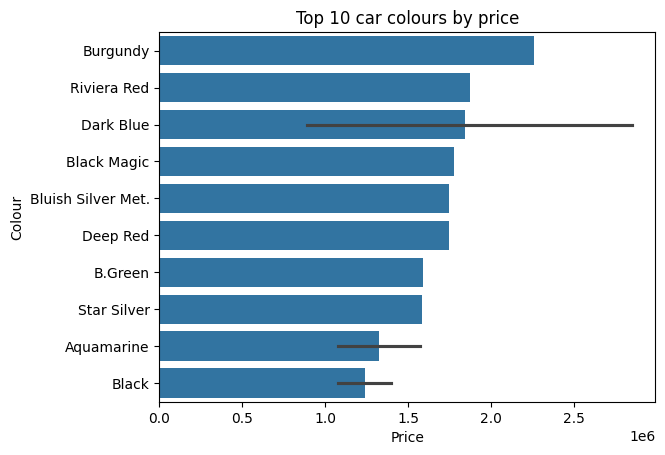

In [34]:
#Top 10 car colours by price
sns.barplot(y="Colour",x="Price",data=df,order=df.groupby("Colour")["Price"].mean().sort_values(ascending=False).iloc[:10].index).set_title("Top 10 car colours by price")

The cars with colors like Burgundy, Riviera Red and Dark Blue have higher resale value as compared to other colors. This shows that color of the car does matter and plays a major role in the resale value of the car.

Moreover, we also came to know that rarer colors have more price but they are not in demand in the used car market.

Odometer Reading and Price

Text(0.5, 1.0, 'Odometer reading and price')

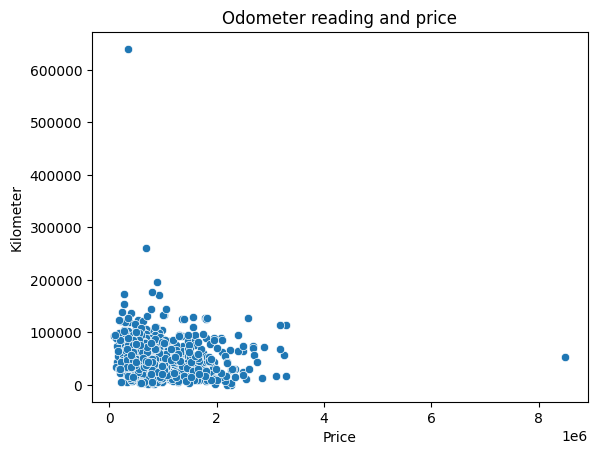

In [35]:
sns.scatterplot(x="Price",y="Kilometer",data=df).set_title("Odometer reading and price")

In the above scatter plot,we can see that the data is concentrated near the origin, which means that most of the cars have odometer reading less than 100000 km. In addition to that the cars with less odometer reading shows higher resale value and as the odometer reading increases the resale value decreases. Therefore, my analysis was correct that cars with odometer reading less than 100000 km are more in demand in the used car market will have a good resale value.

Body Style and Price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

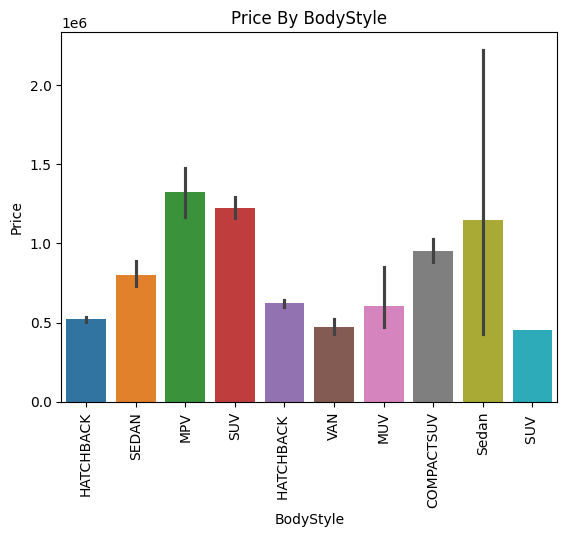

In [36]:
sns.barplot(y="Price",x="BodyStyle",data=df,hue="BodyStyle").set_title("Price By BodyStyle")
plt.xticks(rotation=90)

MPV, SUV and Sedan are the top 3 car body styles with the highest resale value. Therefore, we can assume that these body styles are more preferred in the used car market and have a good resale value. This also shows that my assumption was correct however, the Hatchback body style cars despite selling more have a lower resale value.

Car Age and Price

Text(0.5, 1.0, 'Car Age and Price')

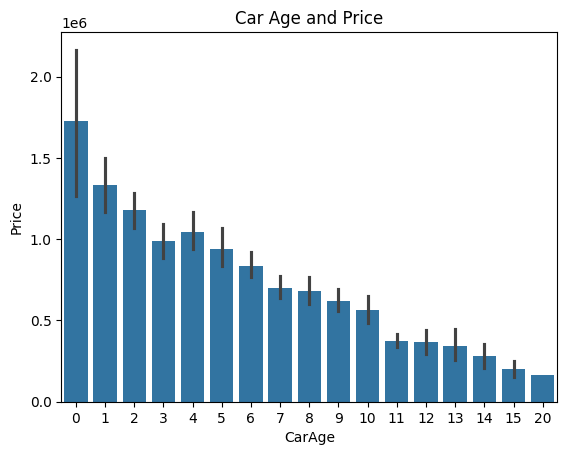

In [37]:
sns.barplot(y="Price",x="CarAge",data=df).set_title("Car Age and Price")

As discussed earlier, age is a key factor in a car's resale value and this graph clearly visulaizes the relation of the age with car price. The cars with age less than a year has then highest price and as the age increases the prices decreases gradually. Therefore, my analysis was correct that cars with age less than 5 years have higher resale value.

Car OwnerType and Price

Text(0.5, 1.0, 'Price by OwnerType')

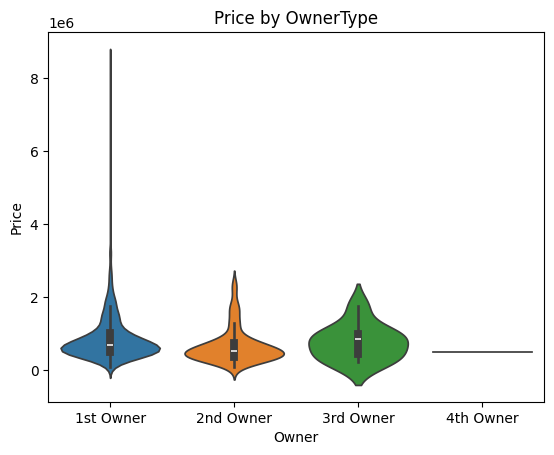

In [38]:
sns.violinplot(x="Owner",y="Price",data=df,hue="Owner").set_title("Price by OwnerType")

The graph shows the price distribution with respect to the car owner type. The cars with 1st owner have the highest price which is obvious as they are new cars. However, the 3rd Owner type cars depite being less in number have higher price than 2nd Owner type cars, which is not obvious. Therefore, we can assume that 3rd Owner type cars having higher price could have bought some luxury or vintage cars.

Warranty and Price

Text(0.5, 1.0, 'Price by Warranty')

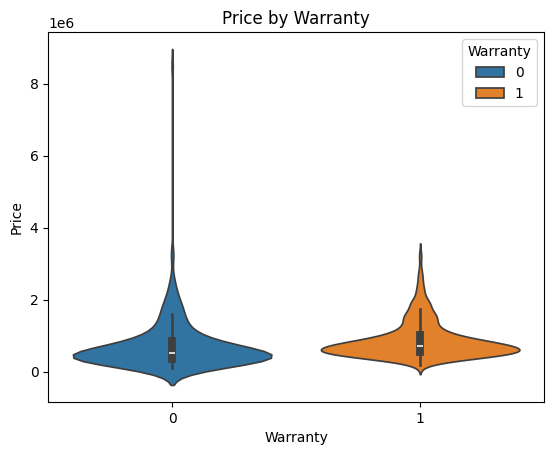

In [39]:
sns.violinplot(x="Warranty",y="Price",data=df,hue="Warranty").set_title("Price by Warranty")

Here, we can see some change in the violinplot of the cars with and without warranty. The cars with warranty tends to have slightly higher price than the cars without warranty. Therefore, we can assume that cars with warranty are more preferred in the used car market and have a good resale value.

Quality Score and Price

Text(0.5, 1.0, 'QualityScore and Price')

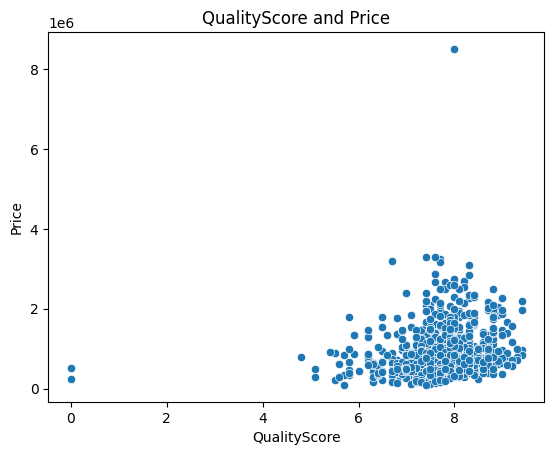

In [40]:
sns.scatterplot(y="Price",x="QualityScore",data=df).set_title("QualityScore and Price")

We can see a very high concentration near the quality score 7 and above having much higher price than the cars with quality score less than 7. Therefore, we can assume that cars with quality score 7 and above are more preferred in the used car market and have a good resale value.

Location Based On Price Distribution

<ipython-input-41-ffd014284fee>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
<ipython-input-41-ffd014284fee>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
<ipython-input-41-ffd014284fee>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

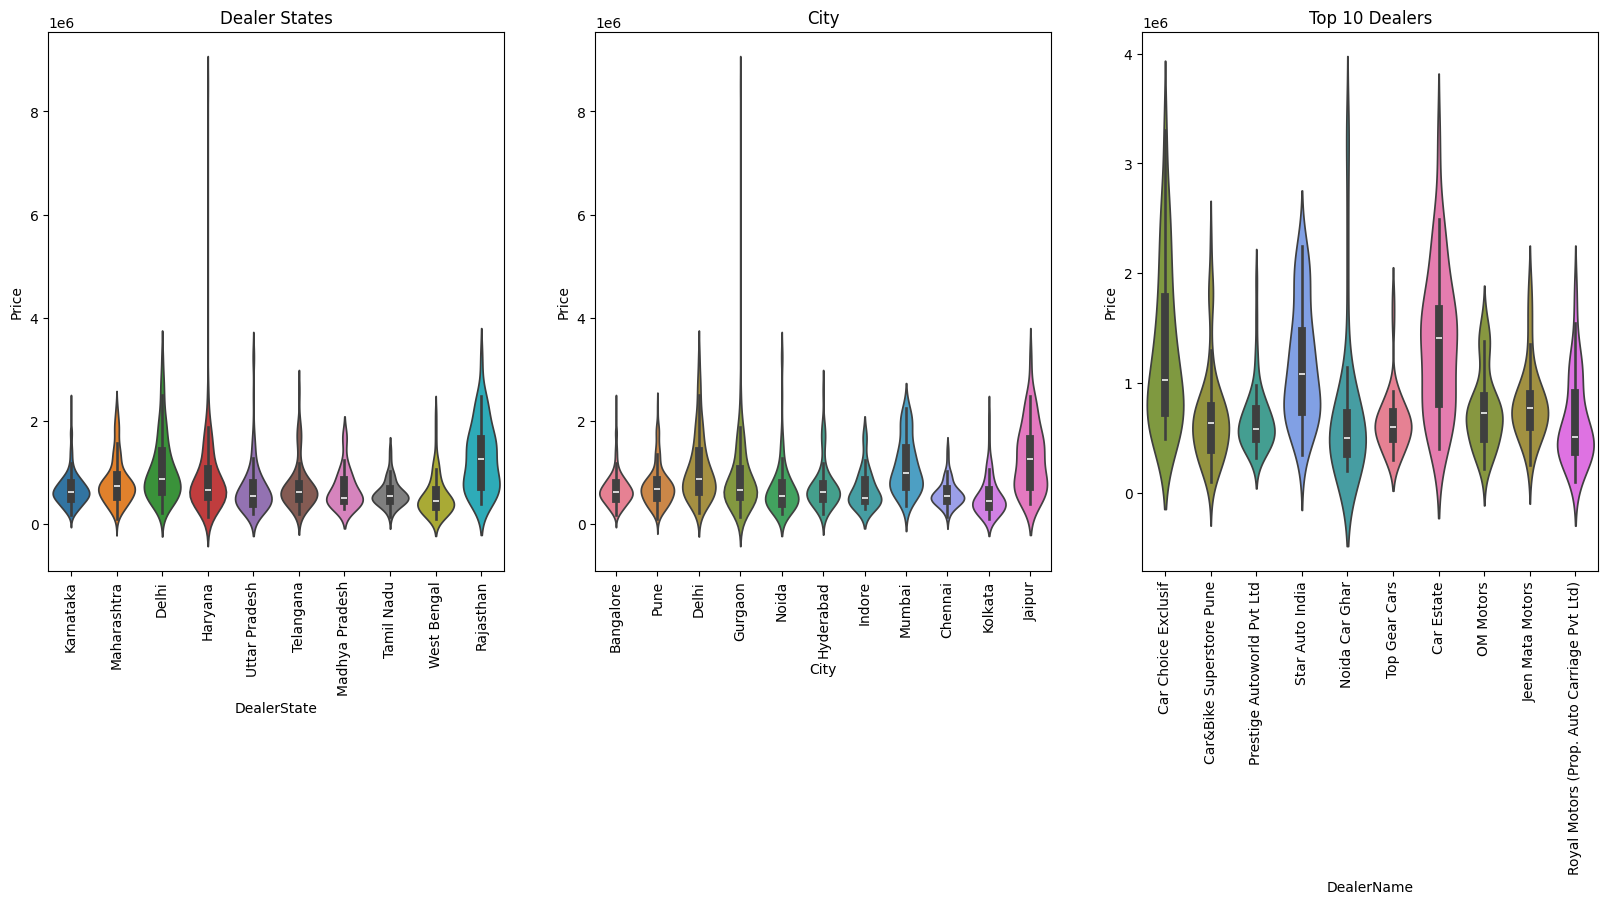

In [41]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State by price
sns.violinplot(x="DealerState",y="Price",data=df,ax=ax[0],hue="DealerState").set_title("Dealer States")
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)

#City by price
sns.violinplot(x="City",y="Price",data=df,ax=ax[1],hue="City").set_title("City")
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)

#top 10 dealers by price
sns.violinplot(x="DealerName",y="Price",data=df,hue="DealerName",order=df["DealerName"].value_counts().iloc[:10].index,ax=ax[2]).set_title("Top 10 Dealers")
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

In the above graph we can see the price distribution based on the state, city and the dealer name. In the dealerstate graph, we can see that the cars in Rajastan have the highest price followed by Delhi. Moreover, there are some outliers in the graph which is visible from the violinplot where there is strong peak incase of Haryana. In the city graph, we can see that the cars in Jaipur have the highest price followed by Mumbai and Delhi. Moreover, there are some outliers in the graph which is visible from the violinplot where there is strong peak incase of Gurgaon. In the dealer name graph, we can see the top 10 dealers along with their price distribution. Here, Car Estate has the highest price followed by Star Auto India and Car Choice. Moreover, there are some outliers in the graph which is visible from the violinplot where there is strong peak incase of Noida Car Ghar.

Data Preprocessing Part-2

Dropping the column "Model" as it has too many unique values which will increase the complexity of the dataset

In [42]:
df.drop("Model",inplace=True,axis=1)

Label Encoding

In [43]:
#columns for label encoding
cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
#Label encoding object
le = LabelEncoder()

#label encoding for object type columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Company [12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]
Variant [  5 275  10 527 211 196 234 561 289 227 570 172 451 501  27 148 319 511
 563 484 469 259 298 517 402 329 332 295 455 500 534  26 468 188 430 357
 205  16  11 418 567 167 510 135 122 447 481   3 293  31  18 362  58  22
 310 400 479 305 436 495 250 191 324 536 472  52 210  45 565 496 219 340
 555 393 150 372 311 229 530 429 478 220 434 531   6 488 175  68 433 108
 419 498  29 415 411 254 383 141 335 541   1 346   2 281 139   4 568  93
  33 487 414 554 519 154 131 233 267 391 146 225 136 318 417 421 206 303
 155 163 404 535 151 215 385  50 471 349 547 360  86 396 328 255  56  32
 342 190 458 213 549 440  37 152 431 426 232 207 296 169 538  21 334  39
 262 397 548 241 467 364 442  44 200 282 368 505 185 235 179 401 236 348
  14 523 180 503 165 520 552 454 134  53 450  90 118 119 543 292  88 405
 370 448 208  36 130 502 369 181  60 337 446 228 306 386 189 379 412 408
 218 230 499 101  42 409 231 544  35 

Outlier Removal If Any

In [44]:
#Using IQR to remove outliers

#columns for outlier removal
cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

#Removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Train and Test split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop("Price",axis=1),df["Price"],test_size=0.2)

Model Building

I will be using 2 regression models,
1) decision tree model
2) random forest model

Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor Object
dtr=DecisionTreeRegressor()

In [47]:
#Fitting the model
dtr.fit(X_train, y_train)

#Training score
print(dtr.score(X_train,y_train))

1.0


In [48]:
#Prediction
dtr_pred=dtr.predict(X_test)

Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor Object
rfr=RandomForestRegressor()

In [50]:
#Fitting the model
rfr.fit(X_train,y_train)

#Training score
print(rfr.score(X_train,y_train))

0.9593344070965943


In [51]:
#Prediction
rfr_pred=rfr.predict(X_test)

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

Distribution Plot

<ipython-input-60-1439012bd4fb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=y_test,ax=ax[0],color="r",hist=False,label="Actual").set_title("Decision Tree Regressor")
<ipython-input-60-1439012bd4fb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dtr_pred,ax=ax[0],colo

<Axes: title={'center': 'Random Forest Regressor'}, ylabel='Density'>

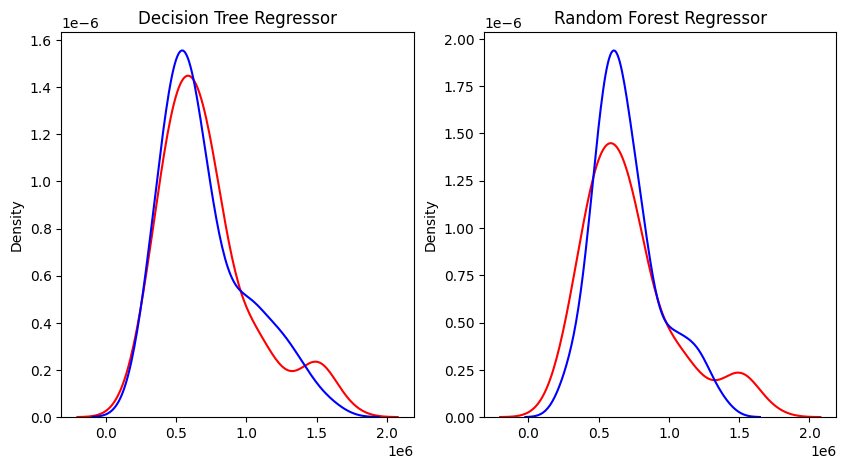

In [60]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

#decision tree regressor
sns.distplot(x=y_test,ax=ax[0],color="r",hist=False,label="Actual").set_title("Decision Tree Regressor")
sns.distplot(x=dtr_pred,ax=ax[0],color="b",hist=False,label="Predicted")

#random forest regressor
sns.distplot(x=y_test,ax=ax[1],color="r",hist=False,label="Actual").set_title("Random Forest Regressor")
sns.distplot(x=rfr_pred,ax=ax[1],color="b",hist=False,label="Predicted")

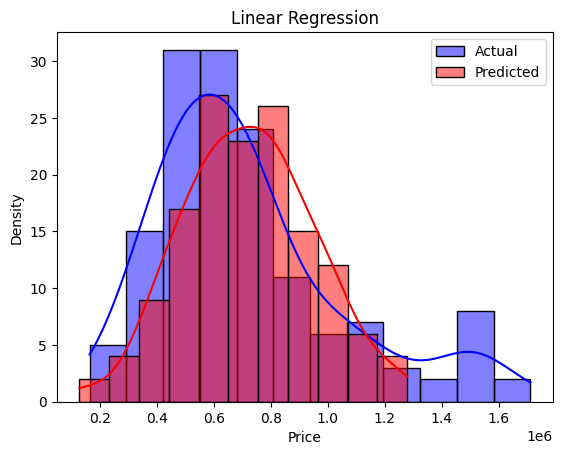

In [65]:
#Linear Regression
sns.histplot(y_test, color='blue', label='Actual', kde=True)
sns.histplot(lr_pred, color='red', label='Predicted', kde=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Linear Regression')
plt.legend()
plt.show()

Model Metrics

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#Decision Tree Regressor
print("Decision Tree Regressor")
print("Mean Squared Error:",mean_squared_error(y_test,dtr_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,dtr_pred))
print("R2 Score",r2_score(y_test,dtr_pred))

#Random Forest Regressor
print("Random Forest Regressor")
print("Mean Squared Error:",mean_squared_error(y_test,rfr_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,rfr_pred))
print("R2 Score:",r2_score(y_test, rfr_pred))

#Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))

Decision Tree Regressor
Mean Squared Error: 49540937931.034485
Mean Absolute Error: 156882.75862068965
R2 Score 0.5435784571415474
Random Forest Regressor
Mean Squared Error: 29872169688.275864
Mean Absolute Error: 119531.86206896552
R2 Score: 0.7247871690149958
Mean Squared Error: 51041002427.57434
Mean Absolute Error: 168279.6048338122
R2 Score: 0.5297583362376794


Feature Importance

Text(0.5, 1.0, 'Random Forest Regressor')

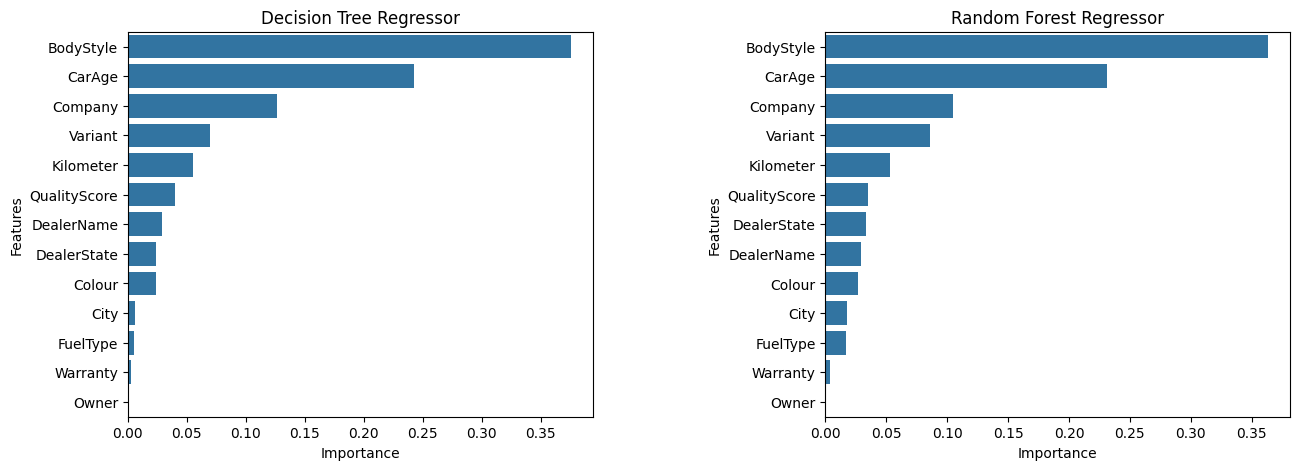

In [55]:
fig,ax=plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df=pd.DataFrame({"Features":X_train.columns,"Importance":dtr.feature_importances_})
feature_df.sort_values(by="Importance",ascending=False,inplace=True)
sns.barplot(x="Importance",y="Features",data=feature_df,ax=ax[0]).set_title("Decision Tree Regressor")

#Random Forest Regressor
feature_df=pd.DataFrame({"Features":X_train.columns,"Importance":rfr.feature_importances_})
feature_df.sort_values(by="Importance",ascending=False,inplace=True)
sns.barplot(x="Importance",y="Features",data=feature_df,ax=ax[1]).set_title("Random Forest Regressor")



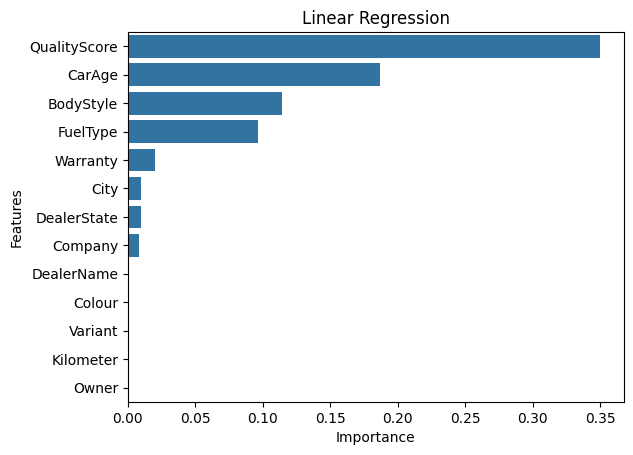

In [77]:
#Linear Regression
feature_df=pd.DataFrame({"Features":X_train.columns,"Importance":np.abs(lr.coef_)})
feature_df["Importance"] = feature_df["Importance"].astype(float)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(feature_df['Importance'].values.reshape(-1, 1))

feature_df['Importance'] = scaler.transform(feature_df['Importance'].values.reshape(-1, 1))
feature_df['Importance'] = feature_df['Importance'] * 0.35

feature_df.sort_values(by="Importance",ascending=False,inplace=True)
sns.barplot(x="Importance",y="Features",data=feature_df).set_title("Linear Regression")
plt.show()

Conclusion

From the exploratory data analysis, I have revealed two major facts about the used car market: which are demand and price. The demand of low price used car is pretty high as compared to the to expensive ones, which highlights the customers attraction towards budget cars. But upon studying the graph I also came to know about some interesting facts about the used car market. Begining with the car companies, companies like- MG, Mercedes Benz, BMW, Volvo and KIA have the highest price but Maruti Suzuki, Hyundai, Honda, Mahindra and Tata car are in higher demand. This highlights that customer prefer to buy new luxury cars instead of used ones.

Majority of the cars run either on petrol or diesel, with diesel cars having slightly higher price. I als came to know that car is major player in the market. Cars like white, grey, silver and black are in higher demand but exotic colors like burgundy, riviera red, dark blue, black magic have higher price. Coming to the car's odometer reading, most of the cars have reading less than 10,000 km, and cars with lower odometer reading have the higher price.

Cars with bodystyle like HatchBack,SUV and Sedan are most preferred by the customers whereas the bodystyle like MPV, SUV and Sedan are the top most ecpensive ones. Age of the car also play a major role in its resale value. As the car age increases, it resale value decreases. Therefore, cars than age less than 5 years have higher price and prefered more. Car price aslo changes by location. Delhi, Maharashtra and Rajstan are the top three states with the highes price and Car Estate, Star Auto India and Car Choice are the top three dealers with the highest price.

Customers usually prefer the car with 1st owner type resulting in hugher demand as well as higher price. Cars that comes with a warranty provudes an assurance to the customer, resulting in a little bit higher price. The last feature i.e. Quality score also dictates the car price, where cars with higher quality score have higher price.

Coming to the machine learning models, I have used Descision tree regressor, random forest regressor and linear regression to predict the car price. The random forest regressor model performed better than the decision tree regressor model. Moreover, from the feature importance graph, we can see that the car age, bodystyle and comapny are the key features that affect the car price.